#  Exploratory Data Analysis (EDA) on Startup Growth & Investment Data

## **Step 1: Load the Dataset**

In [1]:
import pandas as pd
import os
import kagglehub

dataset_path = kagglehub.dataset_download("adilshamim8/startup-growth-and-investment-data")  # Replace with actual path

print(os.listdir(dataset_path))

df = pd.read_csv(os.path.join(dataset_path, "startup_growth_investment_data.csv"))

df.head()


100%|██████████| 141k/141k [00:00<00:00, 53.0MB/s]

Extracting files...
['startup_growth_investment_data.csv']


,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


## **Step 2: Univariate Analysis (Numerical Variables)**
- Here, we analyze the distribution of numerical variables.
- We use a histogram to visualize **Investment Amount (USD)**.


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB


,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


Distribution of Investment Amount

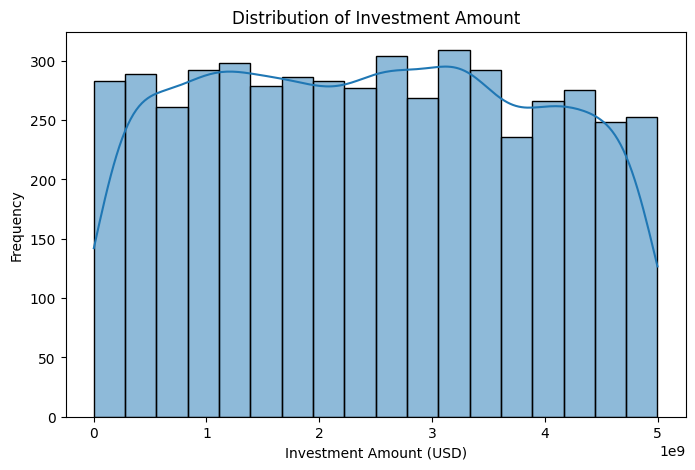

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["Investment Amount (USD)"], kde=True)  # Replace with any numerical column
plt.title("Distribution of Investment Amount")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.show()


## **Step 3: Univariate Analysis (Categorical Variables)**
- We analyze the distribution of startups across different industries.
- A bar plot helps visualize the most common industries.


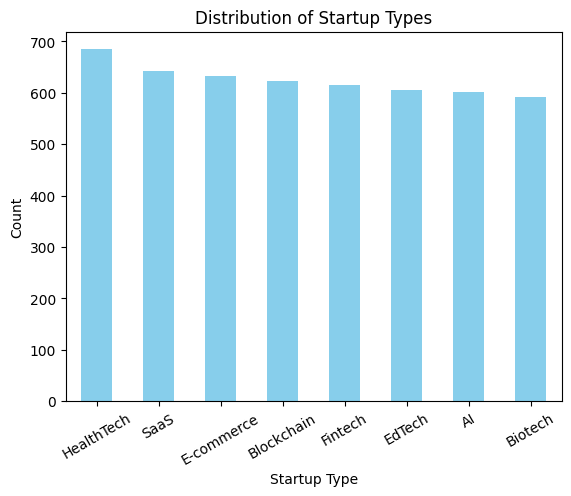

In [4]:
df["Industry"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Startup Types")
plt.xlabel("Startup Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


## **Step 4: Multivariate Analysis (Correlation Matrix)**
- A heatmap helps us identify relationships between numerical features.
- Only numerical columns are selected to avoid errors.


In [7]:
print(df.dtypes)


Startup Name                object
Industry                    object
Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Country                     object
Year Founded                 int64
Growth Rate (%)            float64
dtype: object


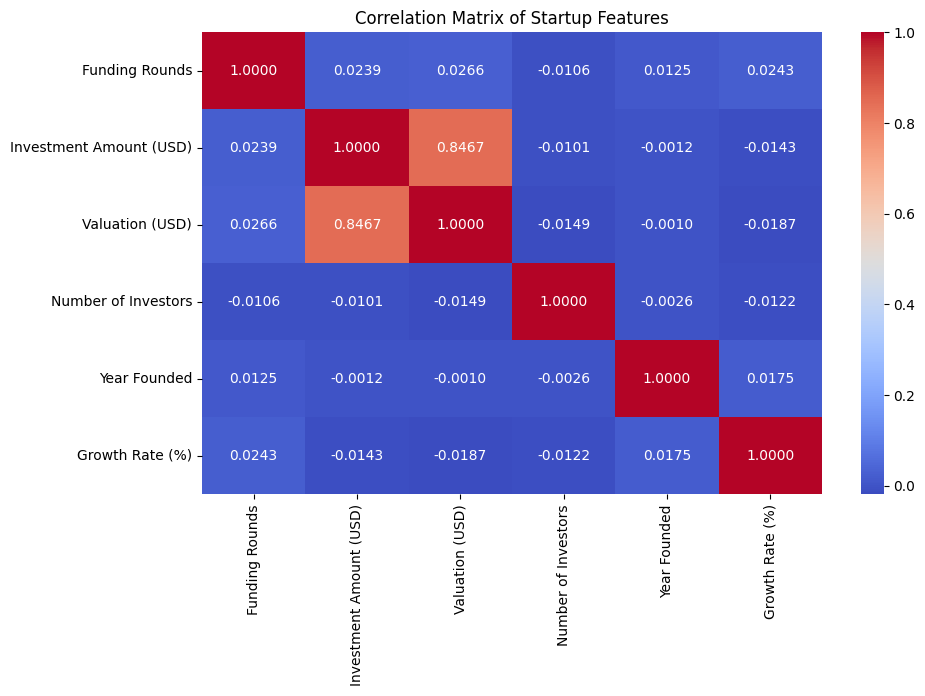

In [9]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Matrix of Startup Features")
plt.show()


## **Step 5: Multivariate Analysis (Scatter Plot)**
- A scatter plot helps visualize the relationship between **Investment Amount** and **Valuation**.


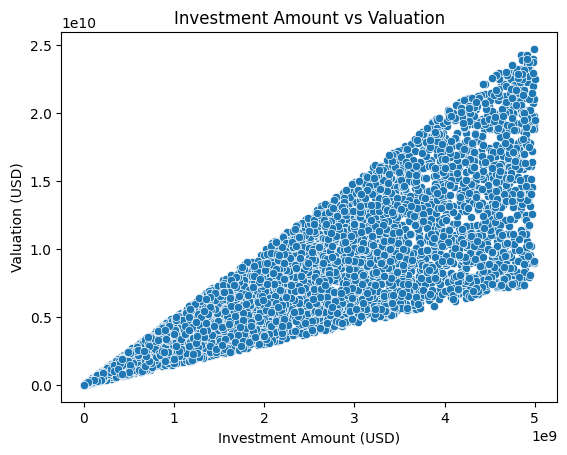

In [15]:
sns.scatterplot(x=df["Investment Amount (USD)"], y=df["Valuation (USD)"])
plt.title("Investment Amount vs Valuation")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.show()


## **Step 6: Multivariate Analysis (Box Plot)**
- A box plot helps compare **Investment Amount** across different industries.


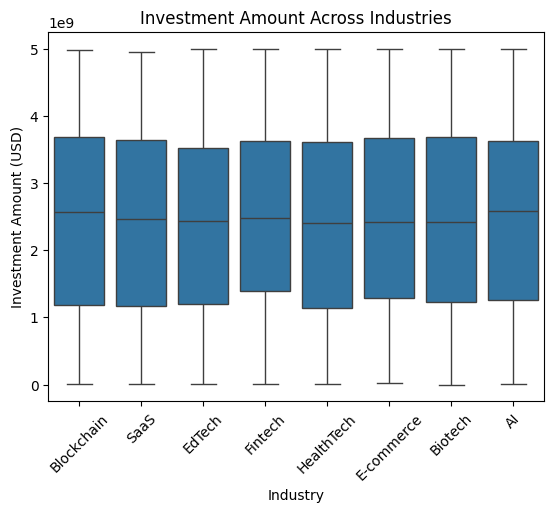

In [16]:
sns.boxplot(x="Industry", y="Investment Amount (USD)", data=df)
plt.title("Investment Amount Across Industries")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()
